# Spotify MRS - Model Development

## 01.Data Import

In [22]:
# Load the final feature set got from feature engineering
import pandas as pd
features=pd.read_csv('pre_processed_data.csv')
# Get the summary for features
features.head()

,pid,name,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,...,type,id,track_href,analysis_url,duration_ms_y,time_signature,artist_pop,genres,track_pop,genres_list
0,0,Throwbacks,1493424000,37,47,52,1,6,11532414,False,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,70,dance_pop hip_hop hip_pop pop_rap r&b rap urba...,67,"['dance_pop', 'hip_hop', 'hip_pop', 'pop_rap',..."
1,0,Throwbacks,1493424000,37,47,52,1,6,11532414,False,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,70,dance_pop hip_hop hip_pop pop_rap r&b rap urba...,67,"['dance_pop', 'hip_hop', 'hip_pop', 'pop_rap',..."
2,123,w o r k o u t,1500681600,171,225,245,1,26,55676545,False,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,70,dance_pop hip_hop hip_pop pop_rap r&b rap urba...,67,"['dance_pop', 'hip_hop', 'hip_pop', 'pop_rap',..."
3,123,w o r k o u t,1500681600,171,225,245,1,26,55676545,False,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,70,dance_pop hip_hop hip_pop pop_rap r&b rap urba...,67,"['dance_pop', 'hip_hop', 'hip_pop', 'pop_rap',..."
4,218,party playlist,1504310400,74,93,98,1,4,21299385,False,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,70,dance_pop hip_hop hip_pop pop_rap r&b rap urba...,67,"['dance_pop', 'hip_hop', 'hip_pop', 'pop_rap',..."


In [23]:
features.columns

Index(['pid', 'name', 'modified_at', 'num_artists', 'num_albums', 'num_tracks',
       'num_followers', 'num_edits', 'playlist_duration_ms', 'collaborative',
       'pos', 'artist_name', 'artist_uri', 'track_name', 'album_uri',
       'duration_ms_x', 'album_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'track_href',
       'analysis_url', 'duration_ms_y', 'time_signature', 'artist_pop',
       'genres', 'track_pop', 'genres_list'],
      dtype='object')

In [24]:
columns_to_cluster = ['acousticness', 'danceability', 'energy', 
                      'instrumentalness', 'liveness','valence', 'tempo','speechiness', 'loudness']

In [25]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
feat_scaled = mms.fit_transform(features[columns_to_cluster])

In [26]:
columns_to_cluster_scaled = ['acousticness_scaled', 'danceability_scaled', 
                             'energy_scaled', 'instrumentalness_scaled', 'liveness_scaled'
                             , 'valence_scaled', 'tempo_scaled','speechiness_scaled', 'loudness_scaled']

df_feat_scaled = pd.DataFrame(feat_scaled, columns=columns_to_cluster_scaled)

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = range(2,21)
ssd = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(feat_scaled)
    preds = km.predict(feat_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(feat_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

Number of Clusters = 2, Silhouette Score = 0.29985594633775203
Number of Clusters = 3, Silhouette Score = 0.19472476982292586
Number of Clusters = 4, Silhouette Score = 0.173525147303758
Number of Clusters = 5, Silhouette Score = 0.1708660551349453
Number of Clusters = 6, Silhouette Score = 0.18541795552295084
Number of Clusters = 7, Silhouette Score = 0.18943557544383924
Number of Clusters = 8, Silhouette Score = 0.16082748668891436
Number of Clusters = 9, Silhouette Score = 0.16845800522969365
Number of Clusters = 10, Silhouette Score = 0.16962538961330192
Number of Clusters = 11, Silhouette Score = 0.16005985010712287
Number of Clusters = 12, Silhouette Score = 0.16212490368811422
Number of Clusters = 13, Silhouette Score = 0.16097828758848734
Number of Clusters = 14, Silhouette Score = 0.16287273914322137
Number of Clusters = 15, Silhouette Score = 0.15443784798029794
Number of Clusters = 16, Silhouette Score = 0.16268538640463925
Number of Clusters = 17, Silhouette Score = 0.16285

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [28]:
k=8
model = KMeans(n_clusters=k, random_state=42).fit(feat_scaled)
pred_full = model.predict(feat_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [4 4 4 4 4 4 4 4 4 4]


In [29]:
import joblib
joblib.dump(model,"model.pkl")

['model.pkl']

In [30]:
df_feat_scaled['cluster'] = model.labels_
df_feat_scaled.head()

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled,cluster
0,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4
1,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4
2,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4
3,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4
4,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4


In [31]:
df_songs_cluster = pd.concat([features,df_feat_scaled], axis=1)
# Save the csv file
df_songs_cluster.to_csv('clusters.csv')
df_songs_cluster.head()

,pid,name,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,...,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled,cluster
0,0,Throwbacks,1493424000,37,47,52,1,6,11532414,False,...,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4
1,0,Throwbacks,1493424000,37,47,52,1,6,11532414,False,...,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4
2,123,w o r k o u t,1500681600,171,225,245,1,26,55676545,False,...,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4
3,123,w o r k o u t,1500681600,171,225,245,1,26,55676545,False,...,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4
4,218,party playlist,1504310400,74,93,98,1,4,21299385,False,...,0.031284,0.917564,0.813566,0.007033,0.025216,0.824847,0.466198,0.127877,0.697978,4


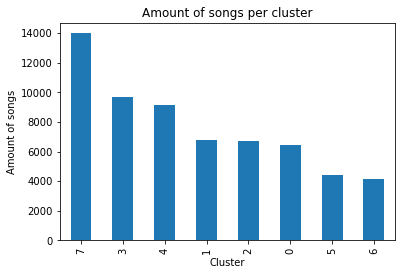

In [32]:
df_feat_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

## 02.Prediction for Given Playlist URL

In [7]:
# Input URL
URL='https://open.spotify.com/playlist/37i9dQZF1DZ06evO45P0Eo?si=4a291e3506ec4835'
# Find the playlist ID
playlist_id = URL.split("/")[4].split("?")[0]
playlist_id

'37i9dQZF1DZ06evO45P0Eo'

In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = "fc0dec7eec794907a5a51813eee49655" 
client_secret = "fc8c4306ffdb4e42944bf0706c67a2d0"

#use the clint secret and id details
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# the URI is split by ':' to get the username and playlist ID
playlist_tracks_data = sp.playlist_tracks(playlist_id)

In [9]:
# Extract the track ID
playlist_tracks_id = []
for track in playlist_tracks_data['items']:
        playlist_tracks_id.append(track['track']['id'])

In [10]:
# Extract the audio features
features = sp.audio_features(playlist_tracks_id)
features_df = pd.DataFrame(data=features, columns=features[0].keys())
features_df = features_df[['acousticness', 'danceability', 'energy', 
                      'instrumentalness', 'liveness','valence', 'tempo','speechiness', 'loudness']]
features_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,valence,tempo,speechiness,loudness
0,0.00374,0.610,0.836,0.000000,0.3580,0.657,126.056,0.0573,-4.455
1,0.00548,0.578,0.857,0.001620,0.0948,0.188,126.979,0.0410,-3.780
2,0.26000,0.788,0.799,0.000008,0.0396,0.905,124.020,0.0509,-6.419
3,0.00131,0.596,0.952,0.000000,0.5980,0.571,127.945,0.0873,-4.364
4,0.00507,0.710,0.955,0.000014,0.2160,0.527,111.984,0.0350,-3.877


In [11]:
# Load the trained ml model
import joblib
model = joblib.load("model.pkl")

In [12]:
# Prediction
prediction=model.predict(features_df.values)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## 03.Recommend the Tracks as per the Predicted Clusters

In [33]:
import numpy as np
# No of tracks should  be recommended
n=10

# Find the unique clusters and number of tracks in each clusters
unique,count=np.unique(prediction,return_counts=True)
t=len(prediction)
l=len(unique)

# Claculate the percentage values for each cluster based on count of tracks in each clusters
p=[]
for i in range(l):
    p.append(count[i]/t)

# Predict the tracks based on percentage value of each cluster
tracks=[]
tracks_df=pd.DataFrame()
for i in range(l):
    tracks.append(df_songs_cluster.track_name[df_songs_cluster['cluster']==unique[i]].sample(n=int(n*p[i])))
    tracks_df=tracks_df.append(pd.DataFrame(tracks[i]))

In [37]:
tracks_df.track_name

21201    What's My Age Again?
2762           Mr. Brightside
30831           Drunk in Love
22132                    Iris
18171             How To Love
5850     Smoking the Day Away
32296          Mountain Sound
33678        Coffee (F***ing)
28126                 Believe
53705       Don't Let Me Down
Name: track_name, dtype: object